#### <span style="color:purple">1:Import CSV </span>


In [1]:
import pandas as pd
df = pd.read_csv('employee_data.csv')

In [2]:
dummies = pd.get_dummies(df["Gender"], drop_first=True)
dummies

,M
0,False
1,True
2,True
3,True
4,False
...,...
395,False
396,False
397,False
398,True


In [3]:
df = df.join(dummies)
df = df.drop("Gender", axis=1)

#### <span style="color:purple">2: Crear las graficas, para visualizar la relacion de los datos </span>


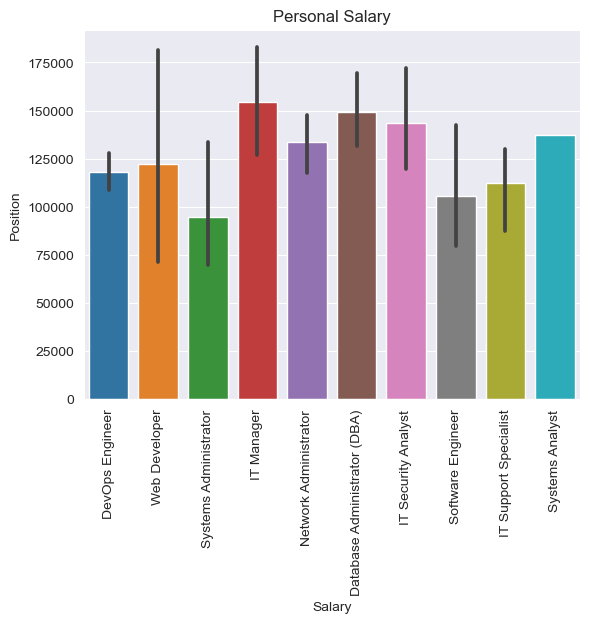

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
# Seleccionar los primeros 50 artistas y sus streams
artist_data = df[["Salary", "Position"]].head(50)

# Crear el gráfico de barras con Seaborn
sns.barplot(x="Position", y="Salary", data=artist_data)

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=90)

# Personalizar el gráfico (opcional)
plt.title("Personal Salary")
plt.xlabel("Salary")
plt.ylabel("Position")

# Mostrar el gráfico
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
# Seleccionamos por ejemplo, el 30% de los datos para el set de prueba
#Random_state es la semilla que se usa para generar números aleatori
set_ent,set_test=train_test_split(df,test_size=0.3,random_state=45)

#### <span style="color:purple">3: Evitar sesgo </span>


In [8]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Ajustar y transformar las categorías a números
df['Categoria_numerica'] = le.fit_transform(df['Position'])


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'DevOps Engineer'),
  Text(1, 0, 'Web Developer'),
  Text(2, 0, 'Systems Administrator'),
  Text(3, 0, 'IT Manager'),
  Text(4, 0, 'Network Administrator'),
  Text(5, 0, 'Database Administrator (DBA)'),
  Text(6, 0, 'IT Security Analyst'),
  Text(7, 0, 'Software Engineer'),
  Text(8, 0, 'IT Support Specialist'),
  Text(9, 0, 'Systems Analyst'),
  Text(10, 0, 'Cloud Solutions Architect')])

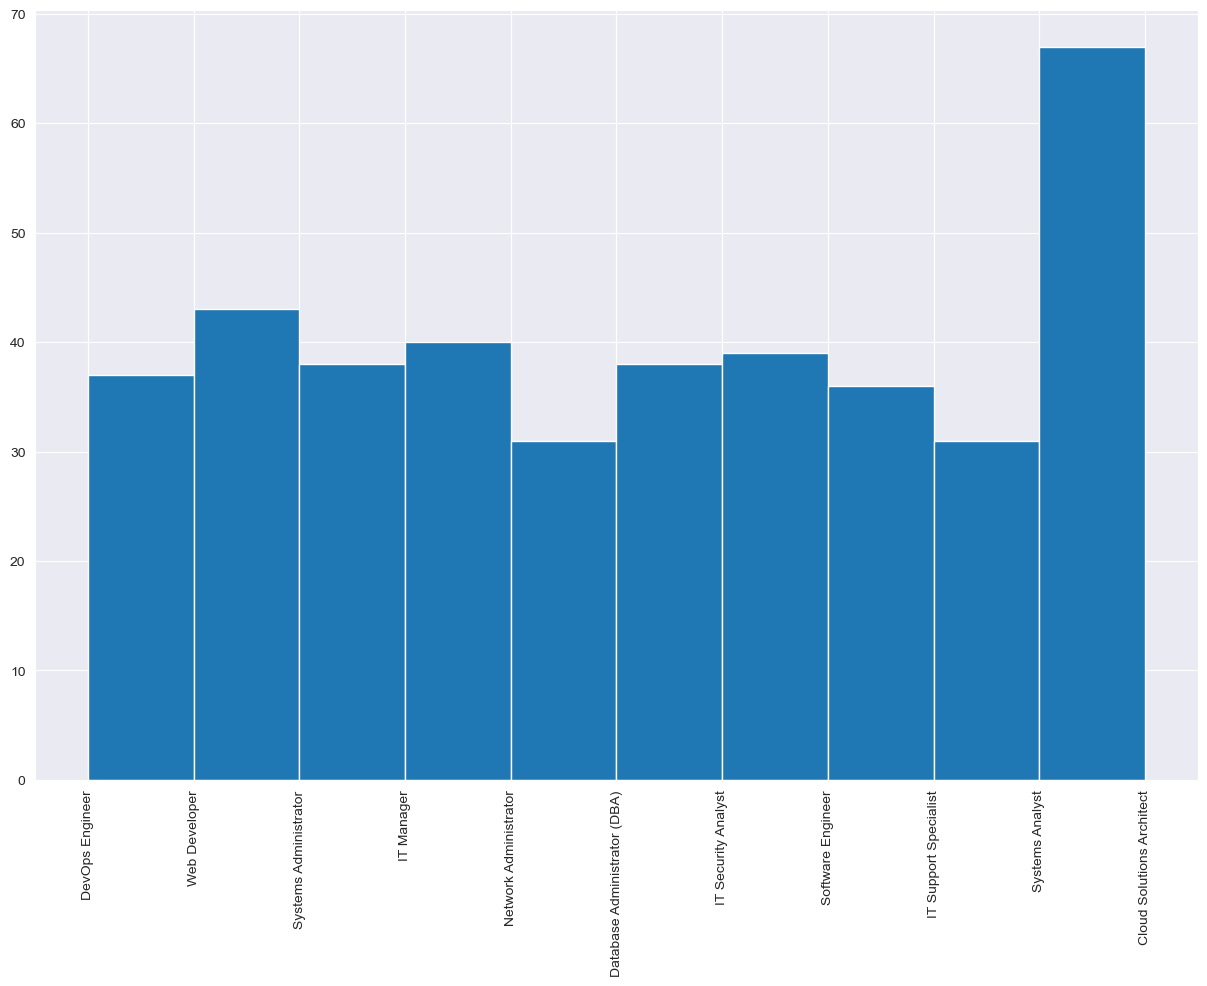

In [9]:
df.Position.hist(figsize=(15,10))
plt.xticks(rotation=90)

#### <span style="color:purple">4:Metodo para crear graficas </span>


In [10]:
import matplotlib.pyplot as plt

def grafica(x_plot, y_plot, df, title="", xlabel="", ylabel="", kind="bar", palette="husl", figsize=(20, 20), **kwargs):
  """
  Crea un gráfico personalizado.
   
  Args:
    x_plot: Columna para el eje x.
    y_plot: Columna para el eje y.
    df: DataFrame con los datos.
    title: Título del gráfico.
    xlabel: Etiqueta del eje x.
    ylabel: Etiqueta del eje y.
    kind: Tipo de gráfico (bar, line, scatter, etc.).
    palette: Paleta de colores.
    figsize: Tamaño de la figura.
    **kwargs: Otros argumentos para personalizar el gráfico.

  Returns:
    El objeto del gráfico.
  """

  # Verificar si las columnas existen
  if x_plot not in df.columns or y_plot not in df.columns:
    raise ValueError("Columnas no encontradas en el DataFrame.")

  # Crear el gráfico
  if kind == "bar":
    sns.barplot(x=x_plot, y=y_plot, data=df, palette=palette)
  else:
    # Otros tipos de gráficos (implementar según sea necesario)
    sns.relplot(x=x_plot, y=y_plot, data=df, kind=kind, palette=palette)

  # Personalizar el gráfico
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.xticks(rotation=90, fontsize=10)
  plt.figure(figsize=figsize)
  sns.set_style("whitegrid")


  # Otros ajustes (opcional)
  for key, value in kwargs.items():
    plt.rcParams[key] = value

  return plt.gcf()


<Figure size 2000x2000 with 0 Axes>

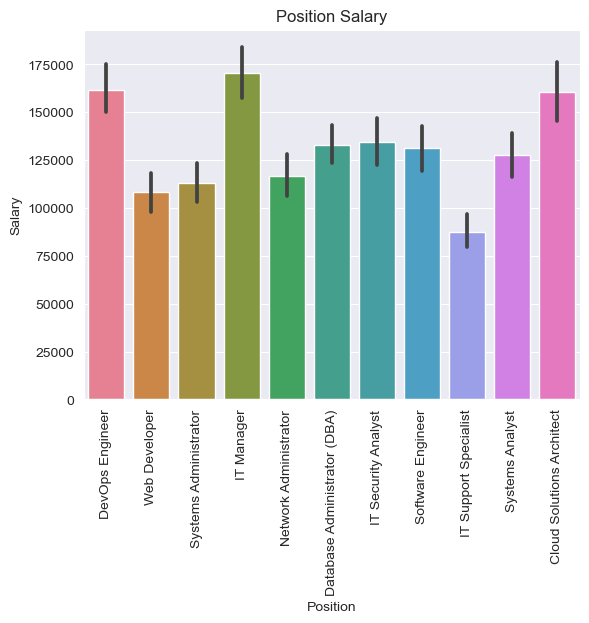

<Figure size 2000x2000 with 0 Axes>

In [11]:
grafica("Position", "Salary", df, "Position Salary","Position","Salary")

<Figure size 2000x2000 with 0 Axes>

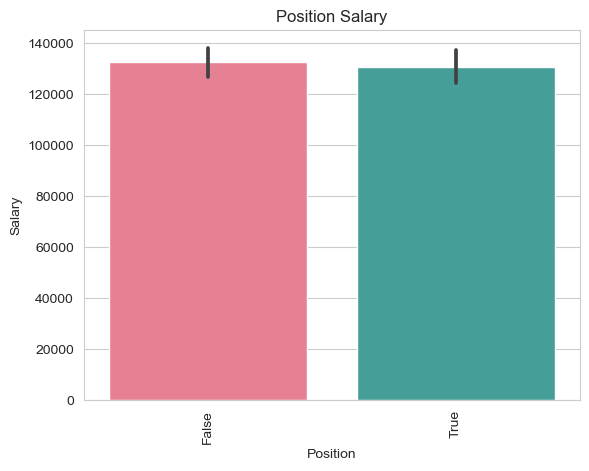

<Figure size 2000x2000 with 0 Axes>

In [12]:
grafica("M", "Salary", df, "Position Salary","Position","Salary")

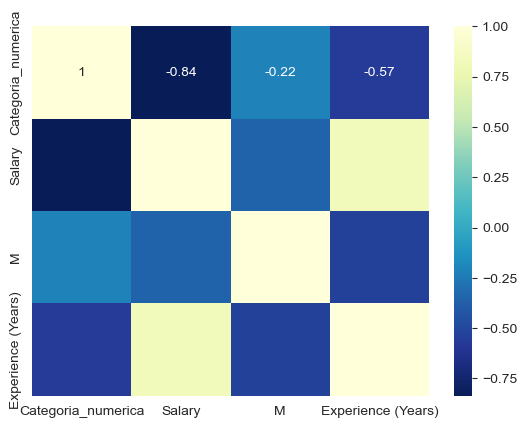

In [13]:
import seaborn as sns
new_df = df.filter(items=["Categoria_numerica","Salary","Age","M","Experience (Years)"])
matriz = new_df.corr(method="pearson")
matriz
# Comparar correlación

#Importar seaborn 

# Crear vector
plt = sns.heatmap(matriz.corr(),annot=True,cmap = "YlGnBu_r")
# Graficar

TypeError: 'Text' object is not callable

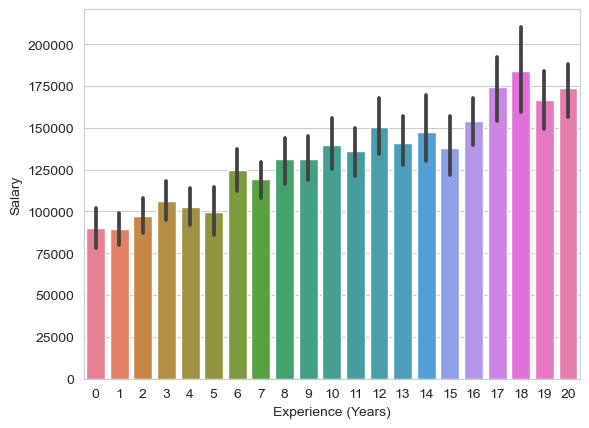

In [14]:
grafica("Experience (Years)", "Salary", df, "Experience (Years) Salary","Experience (Years)","Salary")

In [15]:
#Nuevo df, con la variable a predecir
df_label = df.drop("Position",axis=1)

In [16]:
#Elinar la variable a predecir del df principal
df = df.drop("Position", axis=1)
df

,ID,Experience (Years),Salary,M,Categoria_numerica
0,1,4,109976,False,2
1,2,6,120088,True,2
2,3,17,181301,True,10
3,4,7,77530,True,8
4,5,13,152397,False,8
...,...,...,...,...,...
395,396,19,236045,False,0
396,397,20,182770,False,10
397,398,9,85550,False,6
398,399,18,129996,True,1


In [17]:
df["Salary"].sort_values(ascending=False).head(10) #43k 269k

115    269950
120    268774
61     260594
259    252949
161    244446
347    242819
317    242808
395    236045
23     235235
21     232972
Name: Salary, dtype: int64

<Axes: >

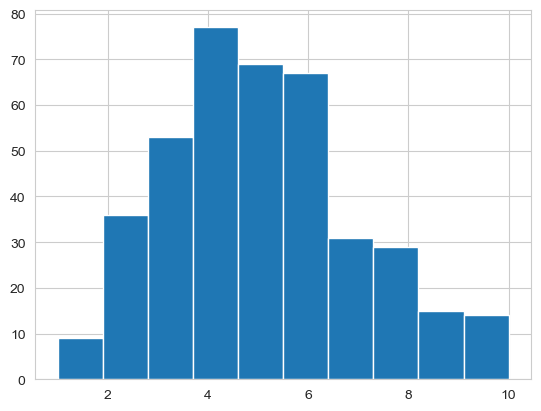

In [18]:
#Dividir los salrios en 10 partes, para evitar sesgo
df["salary_cat"] = pd.cut(df["Salary"],
                           bins=[40000,60000,80000,100000,120000,140000,160000,180000,200000,220000,np.inf
                                ],
                           labels=[1, 2, 3, 4,5, 6,7,8,9,10])
df["salary_cat"].hist()

In [19]:
df["salary_cat"].value_counts()

salary_cat
4     77
5     69
6     67
3     53
2     36
7     31
8     29
9     15
10    14
1      9
Name: count, dtype: int64

In [20]:
## Dividir datos basándonos en nuestras categorías de salarios

from sklearn.model_selection import StratifiedShuffleSplit
# Generamos nuestro objeto para que lo divida en 30% y solo haga una división
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=20)

In [21]:
# Creamos nuestras variables basándonos en nuestras categorías a predecir
for ent_index, prueba_index in split.split(df,df["salary_cat"]):
    cat_set_ent = df.loc[ent_index]
    cat_set_prueba = df.loc[prueba_index]

In [22]:
# Comprobación. Ya en porcentaje
cat_set_prueba["salary_cat"].value_counts()/ len(cat_set_prueba)

salary_cat
4     0.191667
5     0.175000
6     0.166667
3     0.133333
2     0.091667
7     0.075000
8     0.075000
9     0.033333
10    0.033333
1     0.025000
Name: count, dtype: float64

In [23]:
# Creamos dataframe para trabajar con el set de entrenamiento
df_ent = cat_set_ent.copy()
df_ent.head()

,ID,Experience (Years),Salary,M,Categoria_numerica,salary_cat
112,113,2,162398,True,3,7
65,66,17,173720,True,2,7
235,236,0,70195,True,5,2
375,376,3,105768,True,1,4
161,162,17,244446,True,3,10


In [24]:
# Crear Dataframe de predictores y variable a predecir ✂️
df_label = cat_set_ent['Salary']
#dataframe sin salary, porque es la variable que queremos predecir
df = cat_set_ent.drop('Salary', axis=1)
df.head()

,ID,Experience (Years),M,Categoria_numerica,salary_cat
112,113,2,True,3,7
65,66,17,True,2,7
235,236,0,True,5,2
375,376,3,True,1,4
161,162,17,True,3,10


In [25]:
#Eliminar Id, a columna no es necesaria
df = df.drop("ID",axis=1)

Pipe line


In [26]:
# Crear función de pipeline, para empezar con el entrenamiento del modelo
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
# Column Transformer (nos permite transformar varias columnas al mismo tiempo y luego juntarlas)
from sklearn.compose import ColumnTransformer

# Define las columnas numéricas y categóricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

# Crea los pipelines para el procesamiento de las columnas
num_pipeline = Pipeline(steps=[('scaler', StandardScaler())])
cat_pipeline = Pipeline(steps=[('encoder', OneHotEncoder())])

#num_pipeline: 
    #PipeLine(encadena los procesos en un solo objeto, prevenir errores comunes como el “leakage de datos” )
    #steps: son una lista de tuplas. Cada tupla representa un paso en el Pipeline, y consta de un nombre (una cadena de texto) y una instancia de un transformador o un estimador.
    #('scaler', StandardScaler()): Este es el único paso del Pipeline. El nombre del paso es ‘scaler’, y el transformador que se esta utilizando es StandardScaler()
# Combina los pipelines en un ColumnTransformer

preprocessor = ColumnTransformer(
    #ColumnTransformer: Esta es una clase que permite aplicar diferentes transformaciones a diferentes columnas de un DataFrame de pandas o una matriz NumPy.
    transformers=[
        #transformers: Esta es una lista de transformadores, donde cada transformador es una tupla que contiene un nombre, un transformador y las columnas a las que se debe aplicar el transformador  
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
        # ('num', num_pipeline, num_cols): Este es el primer transformador en la lista. El nombre del transformador es ‘num’, el transformador en sí es num_pipeline
                                   # num_cols es una lista de las columnas numéricas a las que se debe aplicar este transformador.
    ])
# lo que hace este código es crear un ColumnTransformer que, cuando se le pase un conjunto de datos, aplicará num_pipeline a las columnas numéricas y cat_pipeline a las columnas categóricas.
preprocessor.fit(df)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 Index(['Experience (Years)'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 Index(['M'], dtype='object'))])

In [29]:
type(preprocessor)
df_label

112    162398
65     173720
235     70195
375    105768
161    244446
        ...  
333    149160
38      87698
98     157705
245     72006
284    133508
Name: Salary, Length: 280, dtype: int64

In [28]:
X_prepared = preprocessor.fit_transform(df)
#fit() en un Pipeline, se ajustan y transforman todos los transformadores en el orden en que fueron añadidos al Pipeline, y luego se ajusta el estimador final con la salida del último transformador.

In [30]:
## Hacer Regresión Lineal (AL FIN)
from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression()
reg_lin.fit(X_prepared, df_label)
#utilizar X_prepared y df_label y ajustamos e modelo
algunos_datos = df.iloc[:10] #pasamos a una variable los 5 primeros datos del df, nos ayudaran a probar el algoritmo de ML
datos_predecir = df_label.iloc[:10] # 10 datos del df_label, los datos a predecir

## iloc: herramienta para seleccionar datos de un DataFrame basándose en su posición o índice numérico.

datos_transformados = preprocessor.transform(algunos_datos)#transformar los datos del df (el que no tiene la variable a predecir) con pipe line

print(f'Predicción:{reg_lin.predict(datos_transformados)}\nOriginales:{list(datos_predecir)}')
print()

Predicción:[ 97427.3727364  166410.42126731  88229.63293228 102026.24263846
 166410.42126731  97427.3727364  179667.0240472  179667.0240472
 134218.33195289 125020.59214877]
Originales:[162398, 173720, 70195, 105768, 244446, 91029, 206324, 182770, 166104, 110734]



In [31]:
#Análisis preambultario de los errores
algunos_datos=df.iloc[:5]
dato_predecir=df_label.iloc[:5]
datos_transformados=preprocessor.transform(algunos_datos)

vp=list(reg_lin.predict(datos_transformados))
vr=list(dato_predecir)

vp=pd.Series(vp)
vr=pd.Series(vr)


abs((vr-vp)/vr).mean()

0.21073610094230572

In [32]:
# Calcular el promedio de la suma de los errores al cuadrado RMSE
from sklearn.metrics import mean_squared_error
prediccion = reg_lin.predict(X_prepared)
error = mean_squared_error(df_label,prediccion)
error = np.sqrt(error)
error

33270.419405168606

In [ ]:
#Sacar el promedio 
df_label.mean()

In [33]:
#Calcular el porcentaje de acierto
error/df_label.mean()

0.2517306040211863

In [34]:
from sklearn.tree import DecisionTreeRegressor
#crear objeto 
reg_arbol = DecisionTreeRegressor()
#correrlo
reg_arbol.fit(X_prepared,df_label)
prediccion = reg_arbol.predict(X_prepared)
#calcular el error
error = mean_squared_error(df_label,prediccion)
error = np.sqrt(error)
error

31219.352238340507

#### <span style="color:purple">11.3 Validación Cruzada </span>


In [35]:
#Importar cross_val_score, creo objeto, corro mi función
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(reg_arbol, X_prepared, df_label, scoring="neg_mean_squared_error",cv = 10)
rmse = np.sqrt(-resultados)
rmse

array([46056.23135863, 40824.17927485, 35642.03997344, 40238.86197184,
       31720.05518305, 34511.0131819 , 41996.5812805 , 31591.78242336,
       34729.98649229, 35194.73004016])

In [37]:
#Calcular el porcentaje de acierto de validación cruzada 
rmse.mean()/df_label.mean()

0.2818450335779905

#### <span style="color:purple">11.4 Bosque Aleatorio </span>


In [38]:
#Importar RandomForestRegressor, creo objeto, corro mi función
from sklearn.ensemble import RandomForestRegressor
reg_forest = RandomForestRegressor()
reg_forest.fit(X_prepared,df_label)
prediccion = reg_forest.predict(X_prepared)

#calcular el error
error = mean_squared_error(df_label,prediccion)
error = np.sqrt(error)
error

31238.857557627725

In [39]:
#Calcular el el promedio de la suma de los errores al cuadrado
resultados = cross_val_score(reg_forest, X_prepared, df_label, scoring="neg_mean_squared_error",cv = 10)
rmse = np.sqrt(-resultados)
rmse

array([45163.62751716, 40425.5541805 , 35152.22731735, 40318.17588097,
       31132.12676726, 35413.76678433, 40722.69687745, 31432.00011175,
       35157.13590745, 35418.30209851])

In [41]:
#Calcular el porcentaje de acierto de bosque aleatorio
rmse.mean()/df_label.mean()

0.28020328366526925

In [45]:
#Importar GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = [{
    'n_estimators': [3,9,15], 'max_features': [1,2,3,4]
}]
grid_search = GridSearchCV(reg_forest,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_prepared,df_label)
#Calcular el mejor parámetro
grid_search.best_params_
#Ver el error
np.sqrt(-grid_search.best_score_)

36980.7740985621

In [52]:
import numpy as np
#¡AHORA SI! A utilizar el set de prueba. Es la última parte 

#Define cuál es el modelo final 
modelo_final = grid_search.best_estimator_

#Aquí definimos cuál será nuestra variable a predecir y las predichas 
Y = cat_set_prueba["Salary"].copy()
X = cat_set_prueba.drop("Salary",axis=1)

#Ahora, sí. El pipeline para limpieza de datos 
X_preparada = preprocessor.transform(X)
prediccion_final = modelo_final.predict(X_preparada)

#Por último, ver el error del modelo 
mse_final = mean_squared_error(Y, prediccion_final)
rmse = np.sqrt(mse_final)
np.sqrt(mse_final)

37150.521905749614

In [ ]:
#Ver el porcentaje de acierto
rmse/Y.mean()

In [68]:
pred_f = prediccion_final[0:10]
y_p = Y[0:10]

In [69]:
print(f'Predicción:{pred_f}\nOriginales:{list(y_p)}')
print()

Predicción:[128050.62444444 127889.03010175 136530.05294372  90378.31902357
 119103.79152459 192748.97465164 178045.48007215  93767.73285714
  90378.31902357 203755.84145503]
Originales:[178571, 106666, 148118, 90721, 107445, 134871, 190672, 70591, 103124, 188959]



In [67]:
type(prediccion_final)

numpy.ndarray